# Constrained Sampling

The importance of using specialized proposal distributions for constrained sample problems can be illustrated 
with a simple example.
Consider a box $[0, 1e5]^d$ for some dimension $d$ and assume the sampler starts close to the origin. 
In this case, a classical isotropical Gaussian proposal distribution will have approximately $\frac{2^d - 1}{2^d}$ of 
its density located outside the constrained region.
Thus, the probability to generate a proposal which lies inside the constrained region is geometrically
distributed and has probability $2^{-d}$.
It is easy to see, that this probability will vanish very quickly, hence, leaving the Markov chain stuck for 
a long time.
More precisely, in expectation it will remain stuck for $2^d$ moves.
In contrast, the Hit-and-Run algorithm will never generate samples outside the constrained region.
The effect of this can be seen by monitoring the acceptance rates of a Gaussian and a Hit-and-Run sampler for the same problem as dimension increases.

In [6]:
import hopsy
import numpy as np
import matplotlib.pyplot as plt

In [9]:
accrates = []
dims = np.array(range(1, 14))

n = 10

for dim in dims:
    problems = [
        hopsy.add_box_constraints(hopsy.Problem(-np.identity(dim), [0]*dim), 
                                  0, 1e3),
        hopsy.add_box_constraints(hopsy.Problem(-np.identity(dim), [0]*dim, hopsy.Gaussian(mean=[0]*dim)), 
                                  0, 1e3),
    ]
    
    for problem in problems:
        print(problem)
        mc = hopsy.MarkovChain(problem, hopsy.GaussianProposal, starting_point=[.01]*dim)
        rng = hopsy.RandomNumberGenerator(seed=42)

        accrate_gaussian, states = hopsy.sample(mc, rng, n_samples=n*2**dim)

        mc = hopsy.MarkovChain(problem, hopsy.GaussianHitAndRunProposal, starting_point=[.01]*dim)
        rng = hopsy.RandomNumberGenerator(seed=42)

        accrate_hitandrun, states = hopsy.sample(mc, rng, n_samples=n*2**dim)

        accrates.append([accrate_gaussian[0], accrate_hitandrun[0]])
    

hopsy.Problem(A=array([[-1.],
       [ 1.]]), b=array([   0., 1000.]), model=PyModel(model=None))


AttributeError: 'NoneType' object has no attribute 'compute_negative_log_likelihood'

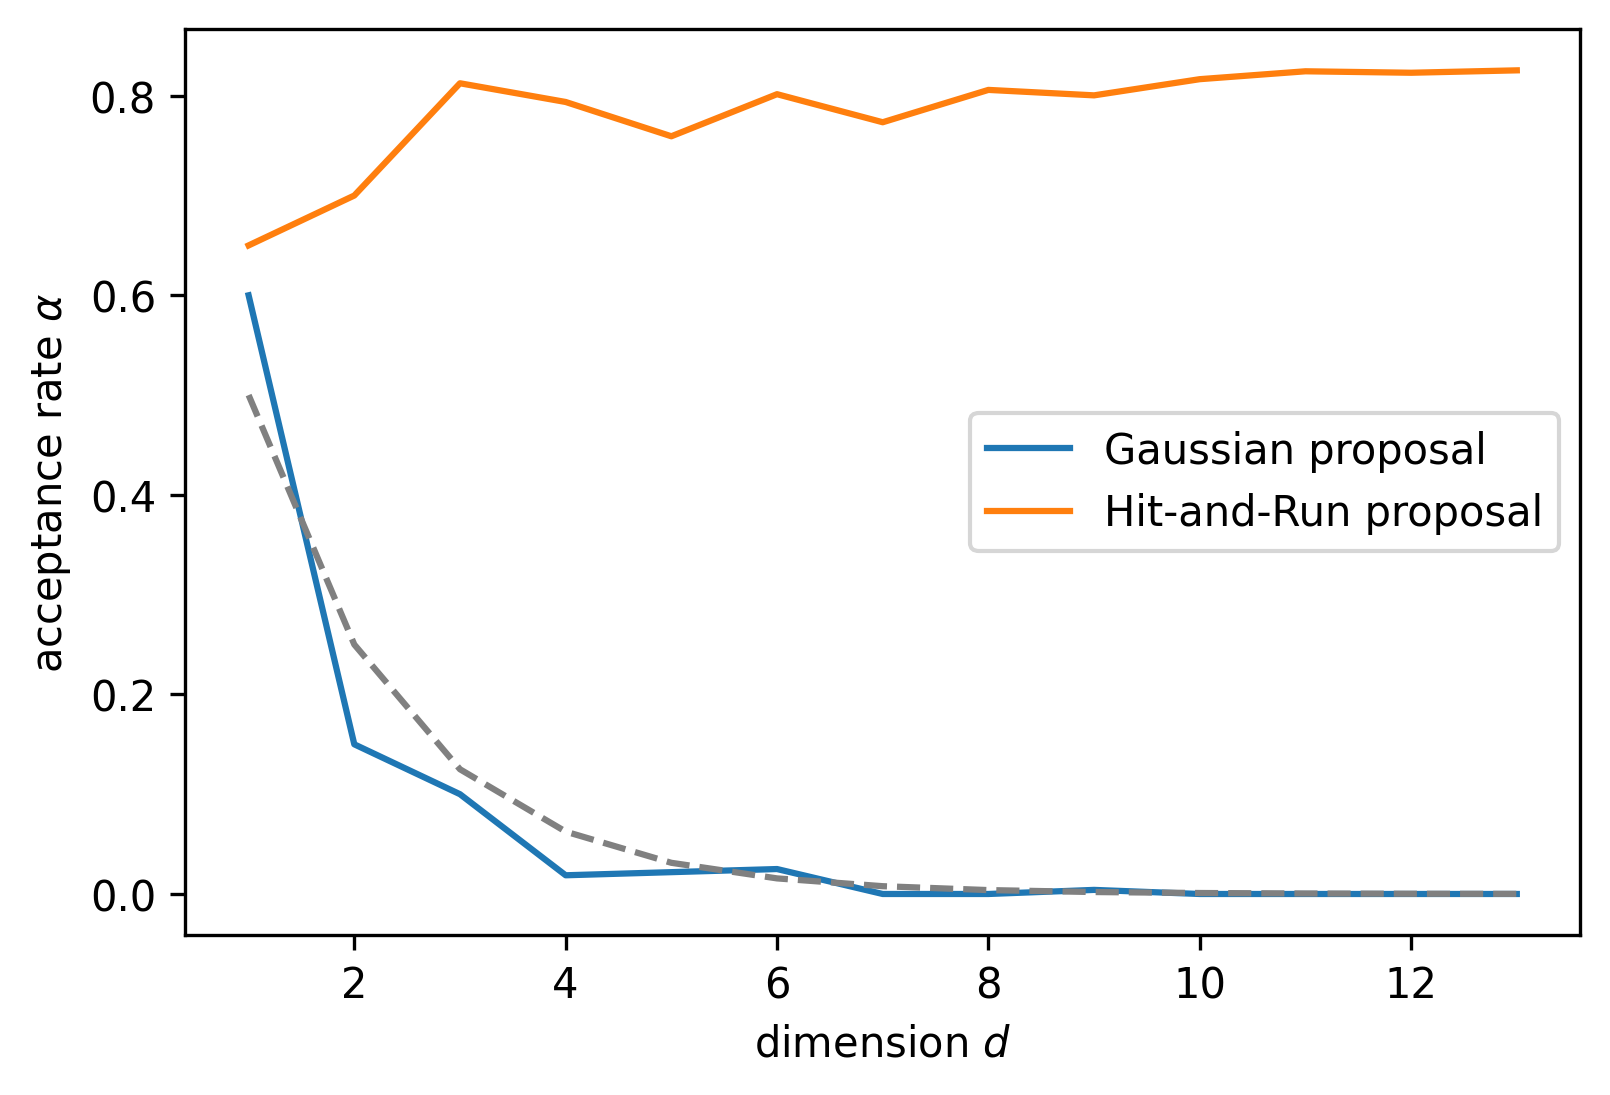

In [4]:
analytical = 1./2**dims

plt.figure(dpi=300)
plt.plot(dims, accrates, label=['Gaussian proposal', 'Hit-and-Run proposal'])
plt.plot(dims, analytical, linestyle='dashed', color='gray')

plt.xlabel(r'dimension $d$')
plt.ylabel(r'acceptance rate $\alpha$')

plt.legend()

plt.show()